<a href="https://colab.research.google.com/github/jedisonfs/Java-ejercicios/blob/develop/EjemplosDistribucionesUNIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Distribucions de probabilidad
David Bacca 

Al trabajar con funciones de distrubución de probabilidad en Python es necesario considerar las siguientes funciones:

* `cdf(y)`: Función de distribución acumulada $F(y)$.

* `sf(y)` = 1 - `cdf(y)` Función de sobrevivencia $S(y)$.

* `pmf(y)`: Función de probabilidad $f(y)$ (distribuciones discretas).

* `pdf(y)`: Función de densidad de probabilidad $f(y)$ (distribuciones continuas).

* `ppf(y)`: Función inversa a `cdf(y)`. Nos permite obtener el valor correspondiente a una probabilidad (percentiles).

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

### **Distribución de probabilidad binomial**

Un **experimento binomial** presenta las siguientes propiedades:

 1. Consiste en un número fijo, $n$, de pruebas idénticas.
 2. Cada prueba resulta en uno de dos resultados: éxito, $S$, o fracaso, $F$.
 3. La probabilidad de éxito en una sola prueba es igual a algún valor $p$ y es el mismo de una prueba a la otra. La probabilidad de fracaso es igual a $q = (1 – p)$.
 4. Las pruebas son independientes.
 5. La variable aleatoria de interés es $Y$, el número de éxitos observado durante las $n$ pruebas

Se dice que una variable aleatoria $Y$ tiene una distribución binomial basada en $n$ pruebas con probabilidad $p$ de éxito si y sólo si
$$
f(y)=\binom{n}{y}p^y(1-p)^{n-y}, \quad y=0,1,2,...,n \text{ y } 0 \le p \le 1
$$

**Valor esperado y varianza**

Sea $Y$ una variable aleatoria binomial basada en $n$ pruebas y probabilidad $p$ de éxito, entonces

$$\mu=E(Y)=np \quad\text{ y }\quad \sigma^2=V(Y)=np(1-p)$$




#### **Ejemplo 1 (binom)**
Suponga que un lote de 5000 fusibles eléctricos contiene 5% de piezas defectuosas. Si se prueba una muestra de 5 fusibles, encuentre la probabilidad de hallar al menos uno defectuoso.

**Solución**

Si $Y$ es el número de fusibles defectuosos (éxitos), dados los valores $p=0.05$ y $n=5$, la pregunta es $P(Y \ge 1)$:

$$P(Y \ge 1)=1-f(0)=1-0.774=0.226$$

In [ ]:
# p=0.05, n=5, P(Y>=1)
n , p = 5, 0.05
Y = ss.binom(n, p)
#A continuación se calcula 1-f(0)

round(1 - Y.pmf(0), 4)

0.2262

In [ ]:
#Gráfica de la distribución 
y = np.arange(n+1)
y

array([0, 1, 2, 3, 4, 5])

In [ ]:
#se guardan las probabilidades en f
f = Y.pmf(y)
f

array([7.73780937e-01, 2.03626563e-01, 2.14343750e-02, 1.12812500e-03,
       2.96875000e-05, 3.12500000e-07])

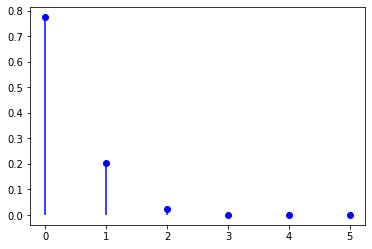

In [ ]:
#Grafica la distribución binomial para el caso de 5 ensayos con probabilidad de éxito 0.05
plt.plot(y,f,"bo")
plt.vlines(y,0,f,"b")
plt.show()

In [ ]:
#cdf(y): función de probabilidad acumulada
#crea un arreglo con las funciones de probabildiad acumuladas F(x)
F = Y.cdf(y)
F

array([0.77378094, 0.9774075 , 0.99884187, 0.99997   , 0.99999969,
       1.        ])

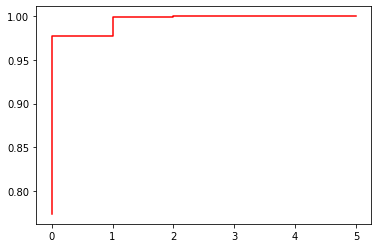

In [ ]:
#Grafica de las probabilidades cumuladas
plt.step(y,F,"r")
plt.show()

#### **Ejemplo 2 (binom)**

La experiencia ha demostrado que 30% de todas las personas afectadas por cierta enfermedad se recuperan. Una empresa fabricante de medicamentos ha inventado una nueva medicina. Diez personas con la enfermedad se seleccionaron al azar y recibieron la medicina; nueve se recuperaron al poco tiempo. Suponga que la medicina no es eficaz en absoluto. ¿Cuál es la probabilidad de que se recuperen al menos nueve de entre diez que recibieron la medicina?

**Solución**

Denotamos $Y$ como el número de personas que se recuperan. Si no funciona la medician, etnonces la probabilidad de que una persona se recupere es $p=0.3$. EL número de esayos son $n=10$ y la pregunta es $P(Y\ge 9)$:

$$P(Y \ge 9)=1-F(8)=0.000144$$
$$P(Y \ge 9)=f(9)+f(10)=0.000144$$


In [ ]:
# P(Y>=9)
n, p = 10, 0.3
Y = ss.binom(n, p)

# 1 - Y.cdf(8)
Y.pmf(9) + Y.pmf(10)

#F(y) = Y.cdf(y)
#f(y) = Y.pmf(y)

0.00014368589999999988

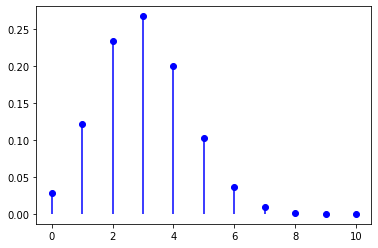

In [ ]:
#Gráfica de la distribución 
y = np.arange(n+1)
f = Y.pmf(y)
plt.plot(y,f,"bo")
plt.vlines(y,0,f,"b")
plt.show()

In [ ]:
print(n*p)
print(n*p*(1-p))
print(np.sqrt(n*p*(1-p)))

3.0
2.0999999999999996
1.4491376746189437


#### **Ejemplo 3 (binom)**

Suponga que un lote de 5000 fusibles eléctricos contiene 5% de piezas defectuosas. Si $n=20$ fusibles, encuentre la probabilidad de que se
observen al menos cuatro defectuosos.

**Solución**

Si se denota con $Y$ el número de defectuosos de la muestra, suponemos el modelo binomial para $Y$, con $p = 0.05$ y $n=20$, entonces la pregunta es $P(Y\ge 4)$:

$$P(Y \ge 4)=1-F(3)=1-0.984=0.016$$
$$P(Y \ge 4)=f(4)+f(5)+...+f(20)=0.016$$

In [ ]:
#P(Y>=4)
n = 20
p = 0.05

Y = ss.binom(n, p)
1 - Y.cdf(3)

0.016

### **Distribución de probabilidad de Poisson**
Se dice que una variable aleatoria $Y$ tiene distribución de probabilidad de Poisson si y sólo si

$$f(y)=\frac{\lambda^y}{y!}e^{-\lambda}$$





**Valor esperado y varianza**

Si $Y$ es una variable aleatoria que posee una distribución de Poisson con parámetro $\lambda$, entonces

$$\mu=E(Y)=\lambda \quad \text{y} \quad \sigma^2=V(Y)=\lambda$$



#### **Ejemplo 1 (poisson)**

Suponga que se diseña un sistema aleatorio de patrulla de policía para que un oficial de patrulla pueda estar en un lugar de su ruta $Y = 0, 1, 2, 3, . . .$ veces por periodo de media hora, con cada lugar visitado un promedio de una vez por periodo. Suponga que $Y$ posee, aproximadamente, una distribución de probabilidad de Poisson. Calcule la probabilidad de que el oficial de patrulla no llegue a un lugar determinado durante un periodo de media hora. ¿Cuál es la
probabilidad de que el lugar sea visitado una vez? ¿Dos veces? ¿Al menos una vez?

**Solución**

El periodo es media hora y el número medio de visitas por intervalo de media hora es $\lambda = 1$ visita/mediaHora.

* La probabilidad de que el oficial de patrulla no llegue a un lugar determinado durante un periodo de media hora es
$$P(Y=0)=f(0)=0.368$$

* La probabilidad de que el lugar sea visitado una vez es

$$P(Y=1)=f(1)=0.368$$

* La probabilidad de que el lugar sea visitado dos veces es

$$P(Y=2)=f(2)=0.184$$

* La probabilidad de que el lugar sea visitado al menos una vez es

$$P(Y \ge 1)=1-f(0)=0.632$$

In [ ]:
#P(Y=0), lambda=1
media = 1
Y = ss.poisson(media)
Y.pmf(0)
#f(y)=Y.pmf(y)

0.36787944117144233

In [ ]:
#P(Y=1), lambda=1
media = 1
Y = ss.poisson(media)
Y.pmf(1)

0.36787944117144233

In [ ]:
#P(Y=2), lambda=1
media = 1
Y = ss.poisson(media)
Y.pmf(2)

0.18393972058572114

In [ ]:
#P(Y>=1), lambda=1
media = 1
Y = ss.poisson(media)
#1-Y.pmf(0)
1-Y.cdf(0)


0.6321205588285576

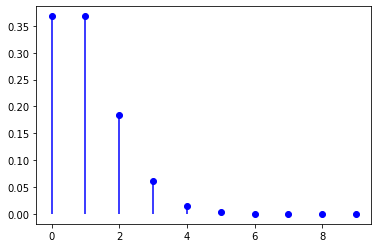

In [ ]:
# Ejemplo: lambda=1
media = 1
Y = ss.poisson(media)

#Función masa de probabilidad
#crea arreglo de números del 0 al 30
y = np.arange(10)
#asigna las probabilidades del para los elementos x, es decir, f(x)
f = Y.pmf(y)
plt.plot(y,f,"bo")
plt.vlines(y,0,f,"b")
plt.show()


#### **Ejemplo 2 (poisson)
**

Cierto tipo de árbol tiene plantas que han crecido de semillas dispersas al azar en una superficie grande, con la densidad media de plantas siendo aproximadamente de cinco por yarda cuadrada. Si en esa zona un guardabosques localiza al azar diez regiones de muestreo de 1 yarda cuadrada, encuentre la probabilidad de que ninguna de las regiones contenga plantas que hayan crecido de semillas.

**Solución**

$Y$ se puede modelar como una variable aleatoria de Poisson con $\lambda = 5$. Como se pide la probabilidad de que $Y=0$ plantas en un área de 10 yardas, se debe recalcular la media: 

$$\lambda = 5 \text{ plantas/yarda} = 50 \text{ plantas/10yarda}$$

Entonces,

$P(Y=0)=f(0)=1.93\times 10^{-22}$

In [ ]:
#P(Y=0)
media = 50
Y = ss.poisson(media)
Y.pmf(0)

#f(y) = Y.pmf(y)
#F(y) = Y.cdf(y)

1.9287498479639178e-22

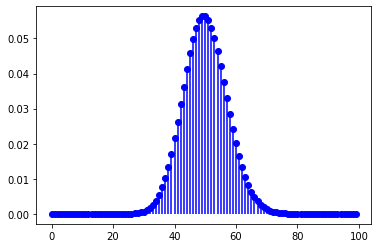

In [ ]:
# Ejemplo: lambda=50
media = 50
Y = ss.poisson(media)

#Función masa de probabilidad
#crea arreglo de números del 0 al 30
y = np.arange(100)
#asigna las probabilidades del para los elementos x, es decir, f(x)
f = Y.pmf(y)
plt.plot(y,f,"bo")
plt.vlines(y,0,f,"b")
plt.show()

#### **Ejemplo 3 (poisson)**

Ocurren accidentes industriales de acuerdo con un proceso Poisson con un promedio de tres accidentes por mes. Durante los últimos dos meses ocurrieron diez accidentes. ¿Este número parece altamente improbable si el número medio de accidentes por mes, $\mu$, es todavía igual a 3? ¿Indica un aumento en el número medio de accidentes por mes?

**Solución**

El número de accidentes en dos meses, $Y$, tiene una distribución de probabilidad de Poisson con media $\lambda = 2(3) = 6$. La probabilidad de que $Y$ sea mayor o igual a 10 es

$$P(Y\ge 10) = 1 - F(9)= 0.0839$$

In [11]:
#P(Y>=10)
media = 6
Y = ss.poisson(media)
1 - Y.cdf(9)

#f(y) = Y.pmf(y)
#F(y) = Y.cdf(y)

NameError: ignored

### **Distribución de probabilidad normal**

Se dice que una variable $Y$ tiene una **distribución normal de probabilidad** si y sólo si, para $\sigma > 0$ y $–\infty < \mu < \infty$, la función de densidad de $Y$ es

$$f(y)=\frac{1}{\sigma \sqrt{2\pi}}e^{-(y-\mu)^2/(2\sigma^2)}, \quad –\infty < y < \infty$$

Si $Y$ es una variable aleatoria normalmente distribuida con parámetros $\mu$ y $\sigma$, entonces

$$E(Y)=\mu \quad \text{y} \quad V(Y)=\sigma^2$$



####**Ejemplo 1 (norm)**

Denote con $Z$ una variable aleatoria normal con media 0 y desviación estándar 1.

1. Encuentre $P(Z>2)$.
2. Encuentre $P(-2\le Z \le 2)$.
3. Encuentre $P(0\le Z \le 1.73)$.

**Solución**

1. $P(Z>2) = 1 - F(2) = 0.0228$.
2. $P(-2\le Z \le 2) = F(2) - F(-2) = 0.9545$.
3. $P(0\le Z \le 1.73) = F(1.73) - F(0) = 0.4582$.

In [16]:
#P(Z>2)
Y = ss.norm(0, 1)
1 - Y.cdf(2)

0.02275013194817921

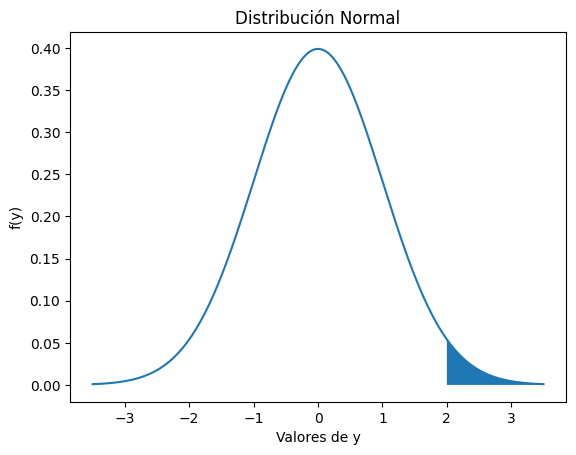

In [17]:
mu = 0
sigma = 1

y1 = 2
y2 = mu + 3.5*sigma

Y = ss.norm(mu, sigma)
y = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma,500)
intervalo = np.linspace(y1, y2, 100)
f = Y.pdf(y)
f_intervalo = Y.pdf(intervalo)
plt.plot(y, f)
plt.fill_between(intervalo, 0, f_intervalo)
plt.title('Distribución Normal')
plt.ylabel('f(y)')
plt.xlabel('Valores de y')
plt.show()

In [8]:
#P(-2<Z<2)
Y = ss.norm(0, 1)
Y.cdf(2) - Y.cdf(-2)

NameError: ignored

In [7]:
mu = 0
sigma = 1

y1 = -2
y2 = 2

Y = ss.norm (mu, sigma)
y = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma,500)
intervalo = np.linspace(y1, y2, 100)
f = Y.pdf(y)
f_intervalo = Y.pdf(intervalo)
plt.plot(y, f)
plt.fill_between(intervalo, 0, f_intervalo)
plt.title('Distribución Normal')
plt.ylabel('f(y)')
plt.xlabel('Valores de y')
plt.show()

NameError: ignored

In [ ]:
#P(0<Z<1.73)
Y = ss.norm(0, 1)
Y.cdf(1.73) - Y.cdf(0)

0.4581848623864051

In [2]:
mu = 0
sigma = 1

y1 = 0
y2 = 1.73

Y = ss.norm(mu, sigma)
y = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma,500)
intervalo = np.linspace(y1, y2, 100)
f = Y.pdf(y)
f_intervalo = Y.pdf(intervalo)
plt.plot(y, f)
plt.fill_between(intervalo, 0, f_intervalo)
plt.title('Distribución Normal')
plt.ylabel('f(y)')
plt.xlabel('Valores de y')
plt.show()

NameError: ignored

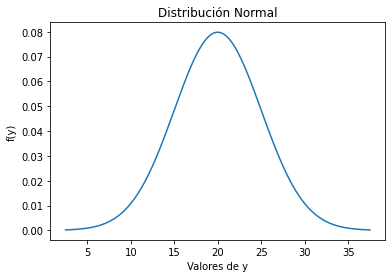

In [ ]:
#Normal sin área sombreada
mu = 20
sigma = 5
Y = ss.norm(mu, sigma)
y = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma,500)
f = Y.pdf(y)
plt.plot(y, f)
plt.title('Distribución Normal')
plt.ylabel('f(y)')
plt.xlabel('Valores de y')
plt.show()

####**Ejemplo 2 (norm)**
Las calificaciones para un examen de admisión a una universidad están normalmente distribuidas con media de 75 y desviación estándar 10. ¿Qué fracción de las calificaciones se encuentra entre 80 y 90?

**Solución**

Estandarizando, se tiene

$$z=\frac{y - \mu}{\sigma}$$

por lo tanto, con $\mu=75$ y $\sigma=10$, se tiene que 

$$z_1=\frac{80-75}{10}=0.5 \quad \text{y} \quad z_2=\frac{90-75}{10}=1.5$$

Entonces

$$P(80 \le Y \le 90) = P(0.5 \le Z \le 1.5) = F(Z = 1.5) - F(Z = 0.5) = 0.2417.$$

Sin estandarizar, se puede realizar directamente

$$P(80 \le Y \le 90) = F(Y = 90) - F(Y = 80) = 0.2417.$$

In [ ]:
mu = 75
sigma = 10
y1 = 80
y2 = 90

Y = ss.norm(mu, sigma)
Y.cdf(y2) - Y.cdf(y1)

0.2417303374571288

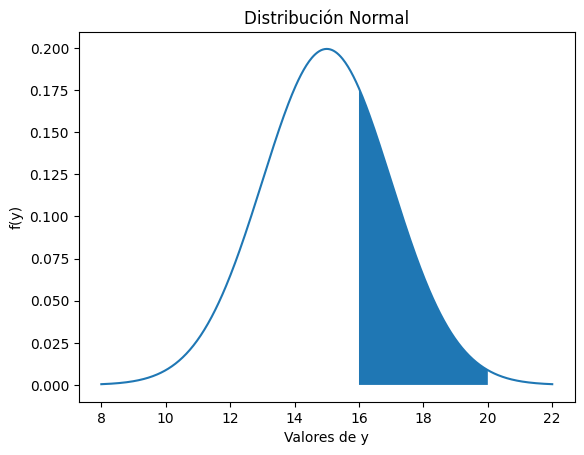

In [18]:
mu = 15
sigma = 2

y1 = 16
y2 = 20

Y = ss.norm(mu, sigma)
y = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma,500)
intervalo = np.linspace(y1, y2, 100)
f = Y.pdf(y)
f_intervalo = Y.pdf(intervalo)
plt.plot(y, f)
plt.fill_between(intervalo, 0, f_intervalo)
plt.title('Distribución Normal')
plt.ylabel('f(y)')
plt.xlabel('Valores de y')
plt.show()